# Practical Assignment 10: PCA and Class Separation

---

## **Submission Details**

| Field | Details |
|---|---|
| **Name** | Ayushkar Pau |
| **ID** | GF202343142 |
| **Subject** | Statistical Foundation of Data Science (CSU1658) |
| **Date** | November 24, 2025 |
| **Repo** |[View My Repository](https://github.com/Ayushkar-Pau/Statistical-Foundation-of-Data-Sciences) |

---

## **Objective**
The goal of this assignment is to analyze the **Wine dataset** by performing basic statistical analysis and visualization. We will then apply **Data Scaling** and **Principal Component Analysis (PCA)** to demonstrate how dimensionality reduction can improve class separation compared to using raw features.

---
## Environment Setup and Dependencies

Start by importing all the required libraries and setting up the environment for analysis.

In [9]:
# --- 1. Environment Setup & Data Loading ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Configure plotting
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style("whitegrid")

# Load the Wine Dataset
wine_data = load_wine()
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
df['class'] = wine_data.target  # Add target labels (0, 1, 2)

# Map target numbers to class names for better readability (optional)
# 0: Class_0, 1: Class_1, 2: Class_2
print("Dataset Shape:", df.shape)
print("Features:", wine_data.feature_names)
df.head()

Dataset Shape: (178, 14)
Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


---
## 1. Question 1: Basic Statistics

> **Instruction**: Display the Basic Statistics using describe().

### Approach
We will use the pandas `describe()` method to generate a statistical summary of all numerical features. This gives us insight into the **central tendency** (mean), **dispersion** (std, min, max), and **distribution shape** (quartiles) of the chemical properties of the wines.

In [10]:
# --- Q1. Basic Statistics ---
print("--- Descriptive Statistics (Transposed for readability) ---")

# .T transposes the table, making it easier to read when there are many columns
stats_summary = df.describe().T
display(stats_summary)

--- Descriptive Statistics (Transposed for readability) ---


,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


### Interpretation
The summary statistics reveal the range and scale of various chemical constituents. For example:
* **Proline** has a very high standard deviation and range compared to **Nonflavanoid phenols**, indicating a large difference in scales between features.
* This discrepancy in scales suggests that **Data Scaling (Normalization)** will be necessary later before applying PCA, as PCA is sensitive to the magnitude of variances.

---
## Question 2: Boxplot by Output Labels

> **Instruction**: Boxplot by output labels/classes.

### Approach
We will create a boxplot to visualize the distribution of a specific feature (e.g., `alcohol`) across the three different wine classes (0, 1, and 2). This helps identify outliers and compare the median values across classes.

/tmp/ipykernel_24075/2130558737.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='alcohol', data=df, palette='Set2')


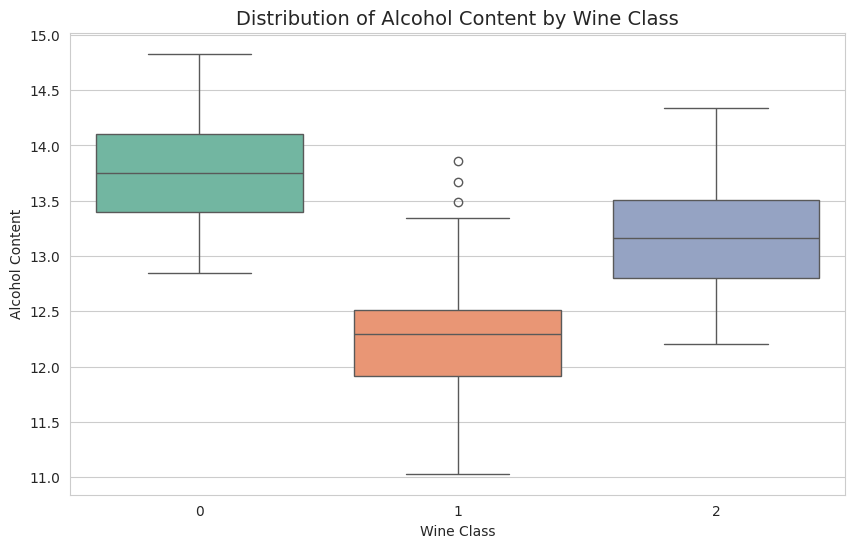

In [11]:
# --- Q2. Boxplot by Class ---

plt.figure(figsize=(10, 6))
# Using 'alcohol' as a representative feature
sns.boxplot(x='class', y='alcohol', data=df, palette='Set2')

plt.title('Distribution of Alcohol Content by Wine Class', fontsize=14)
plt.xlabel('Wine Class')
plt.ylabel('Alcohol Content')
plt.show()

### Interpretation
The boxplot provides a visual comparison of alcohol content:
* **Class 0** tends to have the highest median alcohol content.
* **Class 1** has the lowest median alcohol content.
* The "boxes" (Interquartile Range) show the spread of data for each class. If points appear outside the "whiskers," they represent potential outliers.

---
## Question 3: Scatterplot using Two Variables

> **Instruction**: Scatterplot using two variable.

### Approach
We will plot two continuous variables against each other to check for correlations or clusters. We will examine `alcohol` vs. `color_intensity` and color the points by `class` to see if these two features alone are enough to separate the wine types.

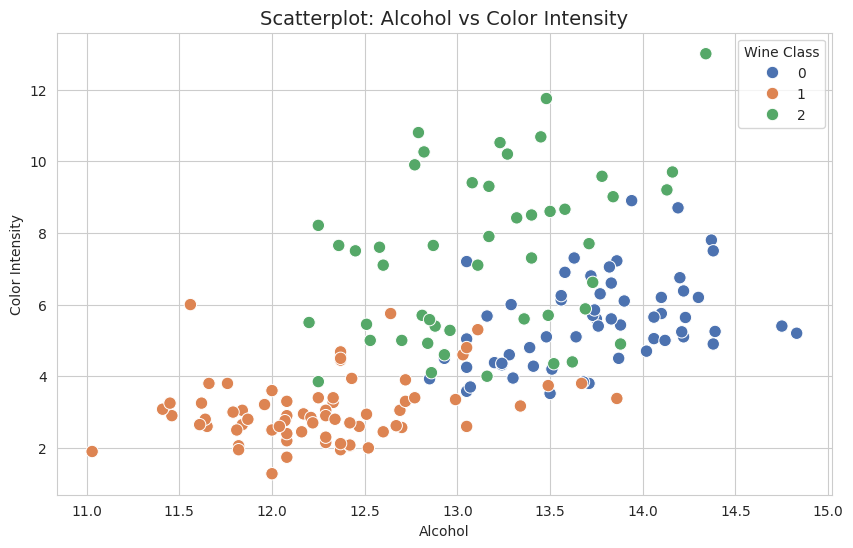

In [5]:
# --- Q3. Scatterplot ---

plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='color_intensity', hue='class', data=df, palette='deep', s=80)

plt.title('Scatterplot: Alcohol vs Color Intensity', fontsize=14)
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.legend(title='Wine Class')
plt.show()

### Interpretation
The scatterplot shows how the classes distribute based on alcohol and color intensity. While there is some grouping (e.g., Class 0 tends to have high alcohol and high color intensity), there is significant overlap between the classes, particularly between Class 1 and Class 2. This suggests that using only two features is likely insufficient for perfect classification.

---
## Question 4: Covariance Matrix

> **Instruction**: Plot Co-Variance Matrix.

### Approach
Covariance measures how two variables change together. We will compute the covariance matrix for the features and visualize it using a heatmap. This helps us identify which features vary together, which is fundamental to how PCA works (PCA looks for directions of maximum variance).

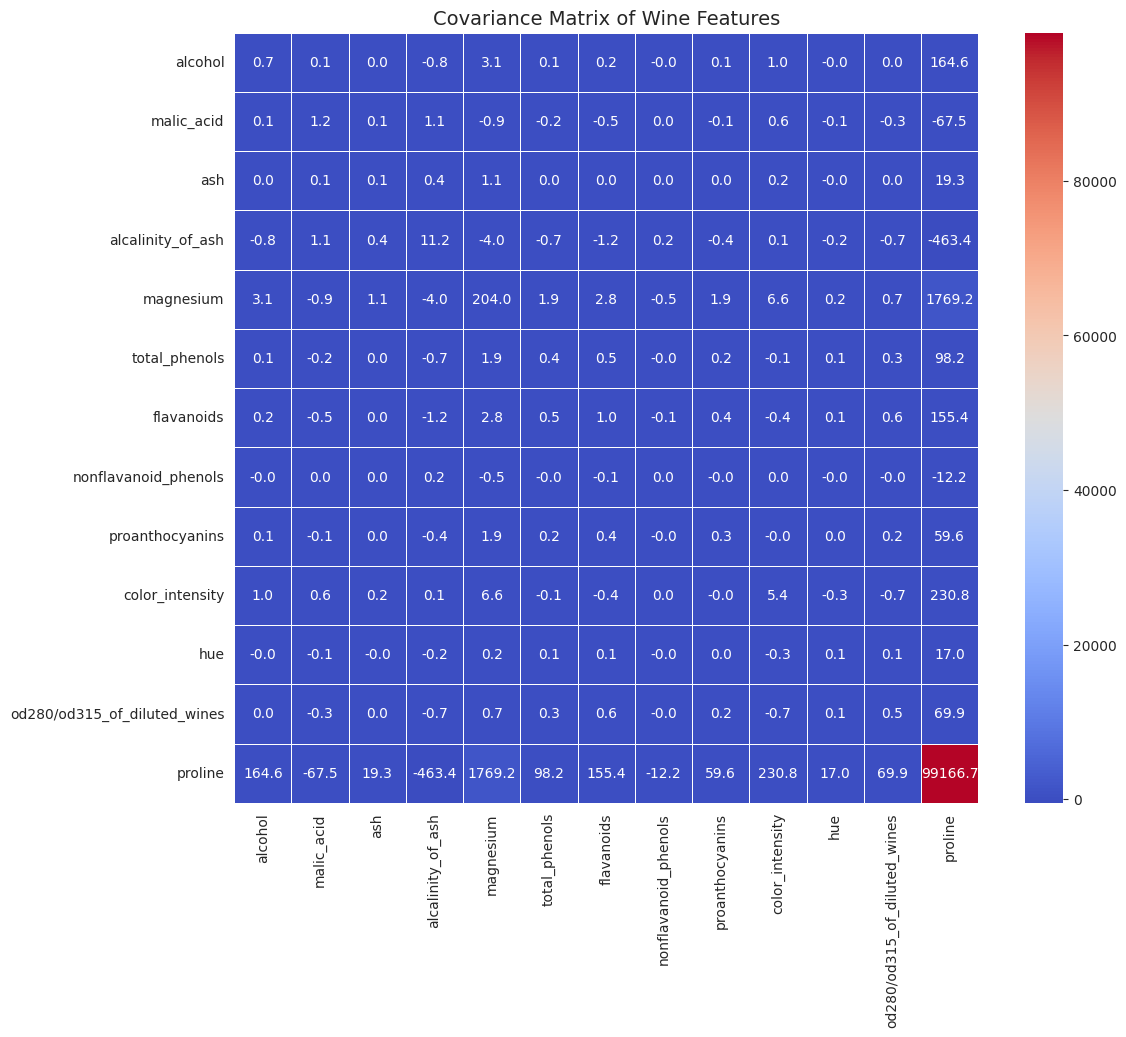

In [6]:
# --- Q4. Covariance Matrix ---

# Drop the target 'class' column for covariance calculation
features = df.drop('class', axis=1)
cov_matrix = features.cov()

plt.figure(figsize=(12, 10))
sns.heatmap(cov_matrix, annot=True, fmt='.1f', cmap='coolwarm', linewidths=0.5)
plt.title('Covariance Matrix of Wine Features', fontsize=14)
plt.show()

### Interpretation
The Covariance Matrix shows the joint variability of two random variables:
* **Diagonal Elements:** Represent the variance of a single feature. Features like `proline` have huge variance (tens of thousands), while others are very small.
* **Magnitude Issue:** The large difference in covariance magnitudes confirms that the features are on vastly different scales. If we run PCA now, `proline` would dominate the first principal component simply because its numbers are bigger, not necessarily because it's more important. This confirms the need for **Scaling**.

---
## Question 5: Data Scaling

> **Instruction**: Data Scaling.

### Approach
To resolve the scale differences observed in the descriptive statistics and covariance matrix, we will apply **Standardization (Z-score Normalization)**. This transforms data such that every feature has a **mean of 0** and a **standard deviation of 1**.

In [7]:
# --- Q5. Data Scaling ---

# 1. Separate Features (X) and Target (y)
X = df.drop('class', axis=1)
y = df['class']

# 2. Initialize and Fit Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Convert back to DataFrame for display
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("--- Data Scaled (First 5 Rows) ---")
print(X_scaled_df.head().round(2))

print(f"\nCheck Mean (should be ~0): {np.mean(X_scaled):.2f}")
print(f"Check Std Dev (should be 1): {np.std(X_scaled):.2f}")

--- Data Scaled (First 5 Rows) ---
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0     1.52       -0.56  0.23              -1.17       1.91           0.81   
1     0.25       -0.50 -0.83              -2.49       0.02           0.57   
2     0.20        0.02  1.11              -0.27       0.09           0.81   
3     1.69       -0.35  0.49              -0.81       0.93           2.49   
4     0.30        0.23  1.84               0.45       1.28           0.81   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        1.03                 -0.66             1.22             0.25  0.36   
1        0.73                 -0.82            -0.54            -0.29  0.41   
2        1.22                 -0.50             2.14             0.27  0.32   
3        1.47                 -0.98             1.03             1.19 -0.43   
4        0.66                  0.23             0.40            -0.32  0.36   

   od280/od315_of_diluted_w

### Interpretation
The data is now standardized. All features now contribute equally to the variance calculations. This ensures that PCA will find components based on actual correlations rather than raw unit sizes (e.g., Magnesium in mg vs. Alcohol in %).

---
## Question 6: Principal Component Analysis (PCA)

> **Instruction**: Show better class separation using principal components.

### Approach
We will apply **Principal Component Analysis (PCA)** to reduce the 13 scaled features down to just **2 Principal Components (PC1 and PC2)**. We will then visualize these two components in a scatterplot. We expect to see distinct clusters for each wine class, showing that PCA has successfully captured the variance that differentiates the classes.

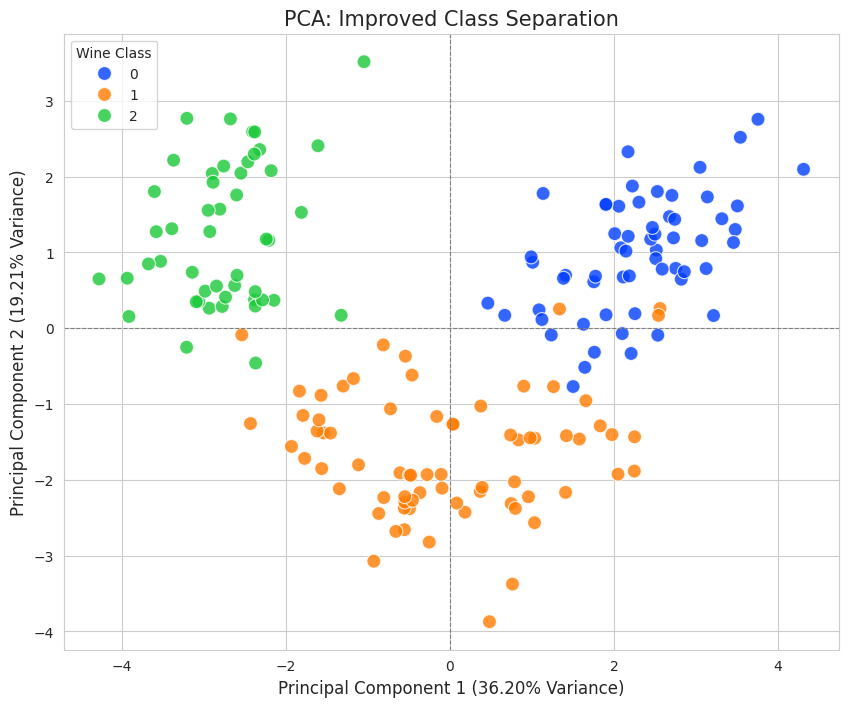

In [8]:
# --- Q6. PCA for Class Separation ---

# 1. Apply PCA to reduce to 2 Dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# 2. Create a new DataFrame with the Principal Components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['class'] = y  # Add the target back for coloring

# 3. Plot the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df, palette='bright', s=100, alpha=0.8)

# Calculate explained variance for labels
var_1 = pca.explained_variance_ratio_[0] * 100
var_2 = pca.explained_variance_ratio_[1] * 100

plt.title('PCA: Improved Class Separation', fontsize=15)
plt.xlabel(f'Principal Component 1 ({var_1:.2f}% Variance)', fontsize=12)
plt.ylabel(f'Principal Component 2 ({var_2:.2f}% Variance)', fontsize=12)
plt.legend(title='Wine Class')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.8)
plt.show()

### Conclusion
The PCA scatterplot demonstrates a significant improvement over the raw feature scatterplot (Q3):
1.  **Clear Separation:** The three wine classes (0, 1, and 2) form distinct, non-overlapping clusters.
2.  **Dimensionality Reduction:** We have successfully compressed the information from 13 dimensions (features) into just 2, while retaining enough information to distinguish the classes.
3.  **Feature Combination:** PC1 and PC2 are not single features but linear combinations of all original features, capturing the directions of maximum variance in the dataset.

## Final Summary and Conclusions

This notebook successfully performed a comprehensive analysis of the Wine dataset, moving from basic exploratory data analysis to advanced dimensionality reduction techniques.

### Summary of Tasks Completed:
* **1. Exploratory Data Analysis:** We used `describe()`, boxplots, and scatterplots to understand the statistical properties and distributions of the features. We observed that features like 'Proline' had much larger scales than others.
* **2. Correlation Analysis:** We computed the Covariance Matrix to understand how features vary together, further highlighting the need for scaling due to magnitude differences.
* **3. Data Preprocessing:** We applied **StandardScaler** to normalize the data, ensuring that features with large values didn't dominate the analysis.
* **4. Dimensionality Reduction (PCA):** We utilized Principal Component Analysis to reduce the 13-dimensional dataset into 2 principal components.

### Key Learnings:
* **The Importance of Scaling:** Without standardization, PCA would have been biased towards features with high variance (like Proline), potentially leading to misleading results.
* **Limitations of Raw Features:** Simple scatterplots of raw features (e.g., Alcohol vs. Color Intensity) often fail to show clear class separation in complex datasets.
* **Power of PCA:** By transforming the data into principal components, we achieved distinct separation between the three wine classes in just 2 dimensions, proving PCA's effectiveness for pattern recognition and visualization in high-dimensional data.

This completes all requirements for Assignment 10.